In [1]:
import pickle
with open('experiment_real_data_non_elec.pkl', 'rb') as file:
    result_per_classifier = pickle.load(file)

In [2]:
import helper_lib
import importlib
importlib.reload(helper_lib)

for name in result_per_classifier:
    print(name)
    (detected_change_points, accuracys_windowed,accuracy_raw) = result_per_classifier[name]
    # helper_lib.visualize_real_stream({"ADWIN":[]},accuracys_windowed)
    # helper_lib.visualize_real_stream(detected_change_points, accuracys_windowed)
    

hoeffding_tree
adaptive_rf


hoeffding_tree


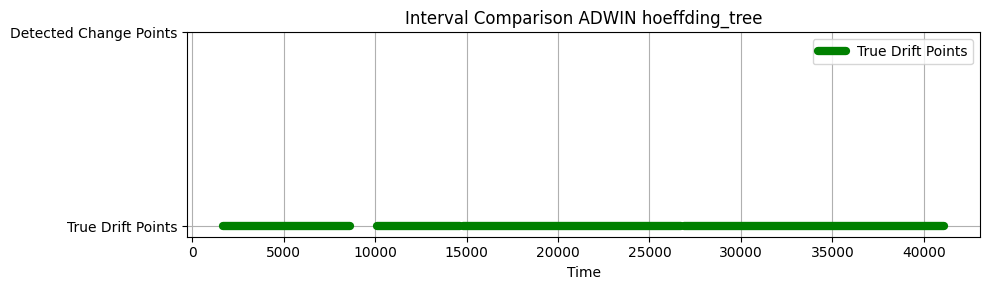

adaptive_rf


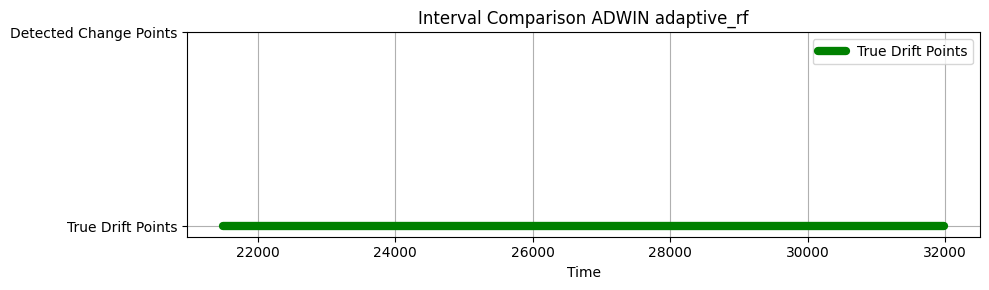

In [3]:
importlib.reload(helper_lib)

for classifier_name in result_per_classifier:
    print(classifier_name)
    (detected_change_points, accuracys_windowed,accuracy_raw) = result_per_classifier[classifier_name]
    for name,detected_point in detected_change_points.items():
        intervals_b = helper_lib.transform_drift_detections_into_intervals(detected_change_points[name],120,600)
        helper_lib.visualize_interval_differences([], intervals_b, labels=('Detected Change Points', 'True Drift Points'),name=name+ " " +classifier_name)

hoeffding_tree


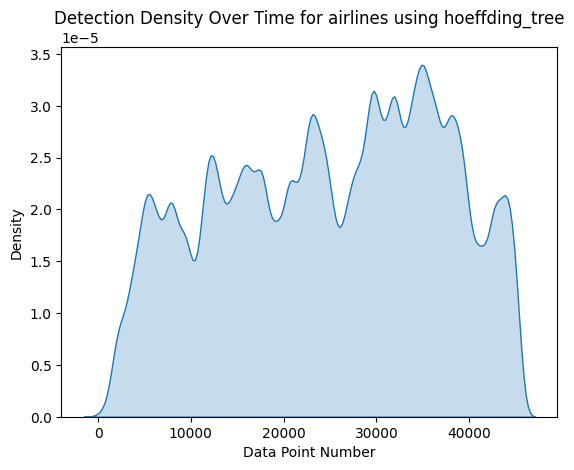

adaptive_rf


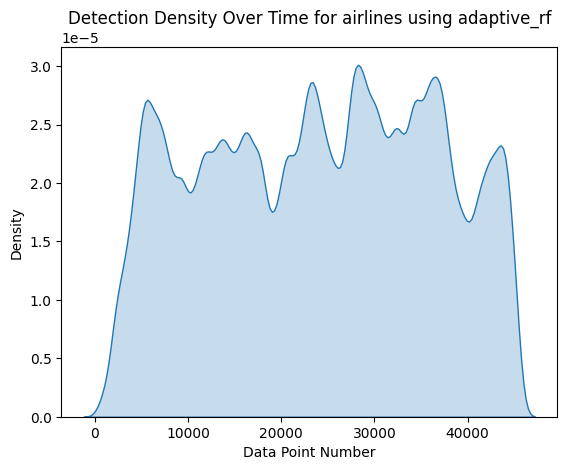

In [ ]:
import importlib
import seaborn as sns
import matplotlib.pyplot as plt

importlib.reload(helper_lib)

for classifier_name in result_per_classifier:
    print(classifier_name)
    (detected_change_points, accuracys_windowed, accuracy_raw) = result_per_classifier[classifier_name]
    for name, detected_point in detected_change_points.items():
        # Flatten all change points into a single list if it's a dictionary of lists
        all_points = []
        if isinstance(detected_change_points, dict):
            for v in detected_change_points.values():
                all_points.extend(v)
        else:
            all_points = detected_change_points

        # Plot with lower bandwidth (bw_adjust < 1) for more detail
        sns.kdeplot(all_points, bw_adjust=0.3,fill = True)
        plt.xlabel('Data Point Number')
        plt.title(f'Detection Density Over Time for electricity using {classifier_name}')
        plt.show()


In [5]:
def smooth_moving_average(binary_list, window_size):
    half_window = window_size // 2
    smoothed = []
    for i in range(len(binary_list)):
        start = max(0, i - half_window)
        end = min(len(binary_list), i + half_window + 1)
        avg = sum(binary_list[start:end]) / (end - start)
        smoothed.append(avg)
    return smoothed

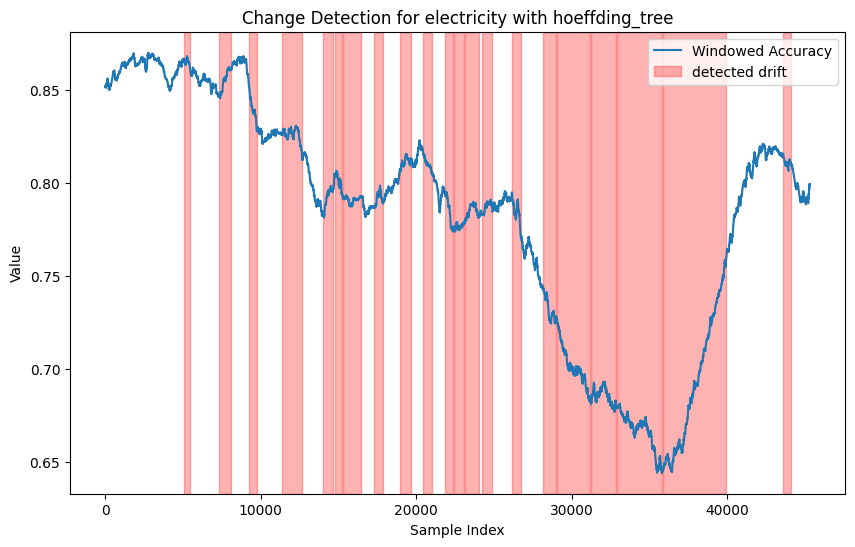

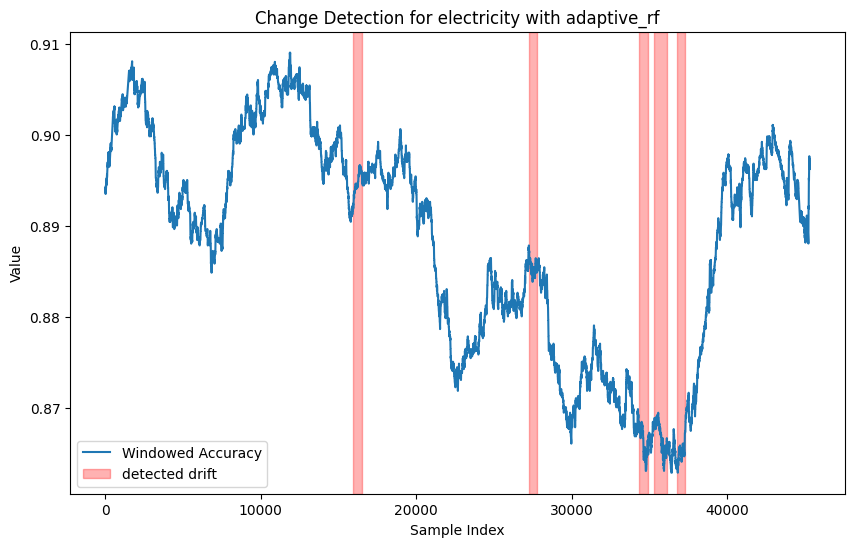

In [20]:
import helper_lib
import importlib
importlib.reload(helper_lib)

# Example intervals – replace this with your actual data

for name in result_per_classifier:
    (detected_change_points, accuracys_windowed, accuracy_raw) = result_per_classifier[name]
    intervals = helper_lib.transform_drift_detections_into_intervals(detected_change_points['ADWIN'],60,100)
    smooth = smooth_moving_average(accuracy_raw, 5000)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(smooth, label='Windowed Accuracy')
    
    # Highlight intervals
    i=0
    for start, end in intervals:
        if i ==0:
            plt.axvspan(start, end, color='red', alpha=0.3, label= 'detected drift')
            i=1
        else:
            plt.axvspan(start, end, color='red', alpha=0.3)
    
    plt.title(f'Change Detection for electricity with {name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


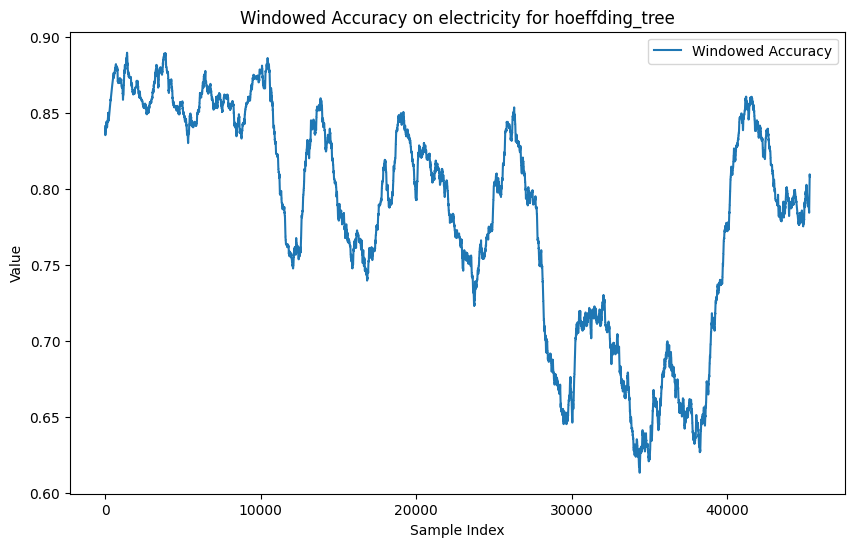

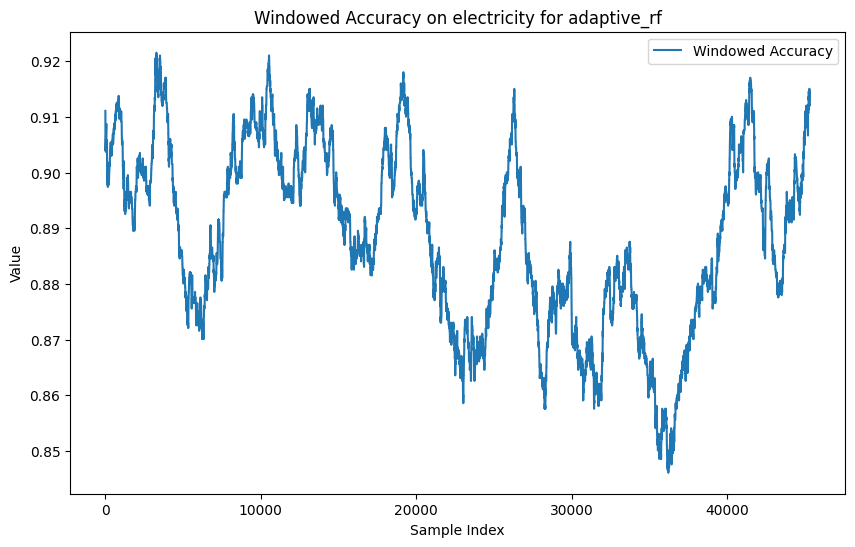

In [21]:
import helper_lib
import importlib
importlib.reload(helper_lib)

# Example intervals – replace this with your actual data

for name in result_per_classifier:
    (detected_change_points, accuracys_windowed, accuracy_raw) = result_per_classifier[name]
    intervals = helper_lib.transform_drift_detections_into_intervals(detected_change_points['ADWIN'],120,600)
    smooth = smooth_moving_average(accuracy_raw, 2000)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(smooth, label='Windowed Accuracy')
    
    # # Highlight intervals
    # for start, end in intervals:
    #     plt.axvspan(start, end, color='red', alpha=0.3)
    
    plt.title(f'Windowed Accuracy on electricity for {name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

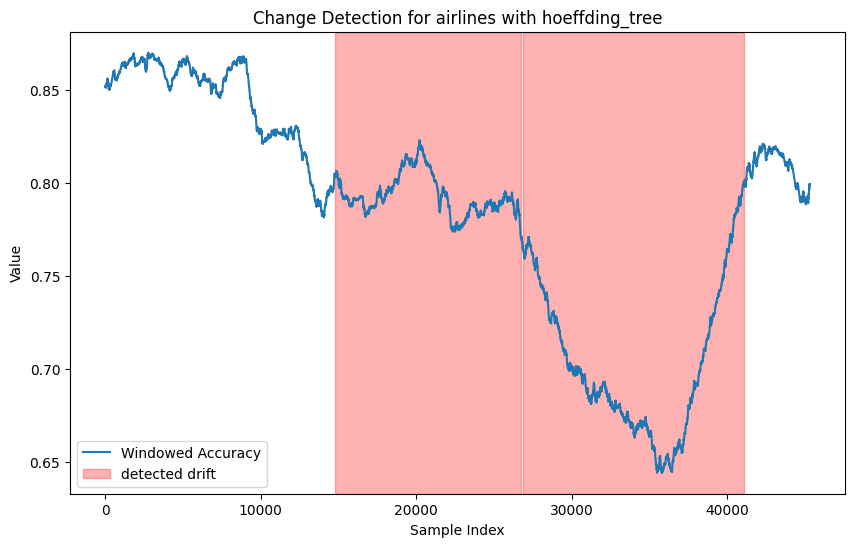

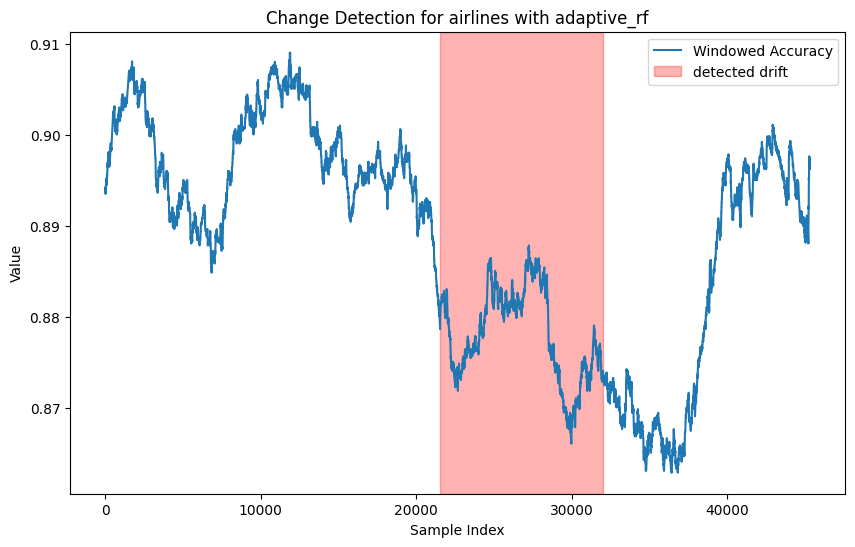

In [8]:
import helper_lib
import importlib
importlib.reload(helper_lib)

# Example intervals – replace this with your actual data

for name in result_per_classifier:
    (detected_change_points, accuracys_windowed, accuracy_raw) = result_per_classifier[name]
    intervals = helper_lib.transform_drift_detections_into_intervals(detected_change_points['ADWIN'],110,800)
    smooth = smooth_moving_average(accuracy_raw, 5000)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(smooth, label='Windowed Accuracy')
    
    # Highlight intervals
    i=0
    for start, end in intervals:
        if i ==0:
            plt.axvspan(start, end, color='red', alpha=0.3, label= 'detected drift')
            i=1
        else:
            plt.axvspan(start, end, color='red', alpha=0.3)
    
    plt.title(f'Change Detection for airlines with {name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
